In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [6]:
df = pd.read_csv('data/lake_data.csv')
df

,Unnamed: 0,HYBAS_ID,lake_growth,lake_decline,all,year,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
0,0,4060050470,131593.043137,-75959.117647,3.822362e+07,2001,1,0.003443,0.001987,207552.160784,186.796945
1,7024,4060685650,5658.352941,-3593.000000,3.436465e+07,2001,4,0.000165,0.000105,9251.352941,8.326218
2,7023,4060623190,3181.278431,-711.000000,6.995463e+06,2001,4,0.000455,0.000102,3892.278431,3.503051
3,7022,4060607420,1443.686275,-544.811765,2.884887e+06,2001,4,0.000500,0.000189,1988.498039,1.789648
4,7021,4060603790,556.109804,-20.000000,7.101565e+05,2001,4,0.000783,0.000028,576.109804,0.518499
...,...,...,...,...,...,...,...,...,...,...,...
11243,3718,4060052910,16481.811765,-7039.780392,6.560509e+06,2019,15,0.002512,0.001073,23521.592157,21.169433
11244,3717,4060052590,13031.019608,-20440.839216,7.190545e+06,2019,15,0.001812,0.002843,33471.858824,30.124673
11245,3716,4060052250,25640.062745,-17944.031373,8.516881e+06,2019,15,0.003010,0.002107,43584.094118,39.225685
11246,3468,4060052510,8063.454902,-3603.000000,7.127448e+06,2019,14,0.001131,0.000506,11666.454902,10.499809


In [4]:
shapefile_path = 'data/hydrobasins_lvl6/hybas_as_lev06_v1c.shp'
shapes = gpd.read_file(shapefile_path)

In [10]:
df = gpd.GeoDataFrame(df.merge(shapes, on=['HYBAS_ID',]))

<Axes: >

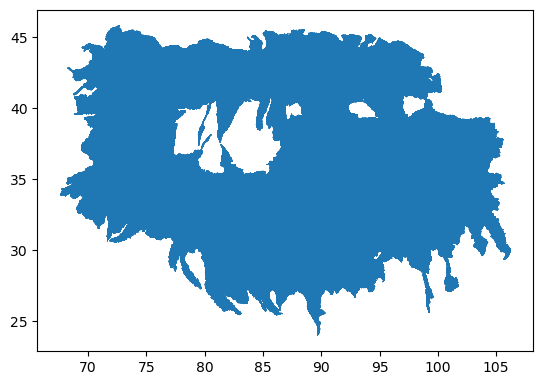

In [11]:
df.plot()

In [14]:
df.columns

Index(['Unnamed: 0', 'HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year',
       'region', 'growth_ratio', 'decline_ratio', 'water_balance',
       'water_balance_m3', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS', 'DIST_SINK',
       'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO', 'COAST', 'ORDER',
       'SORT', 'geometry'],
      dtype='object')

(0.0, 0.1)

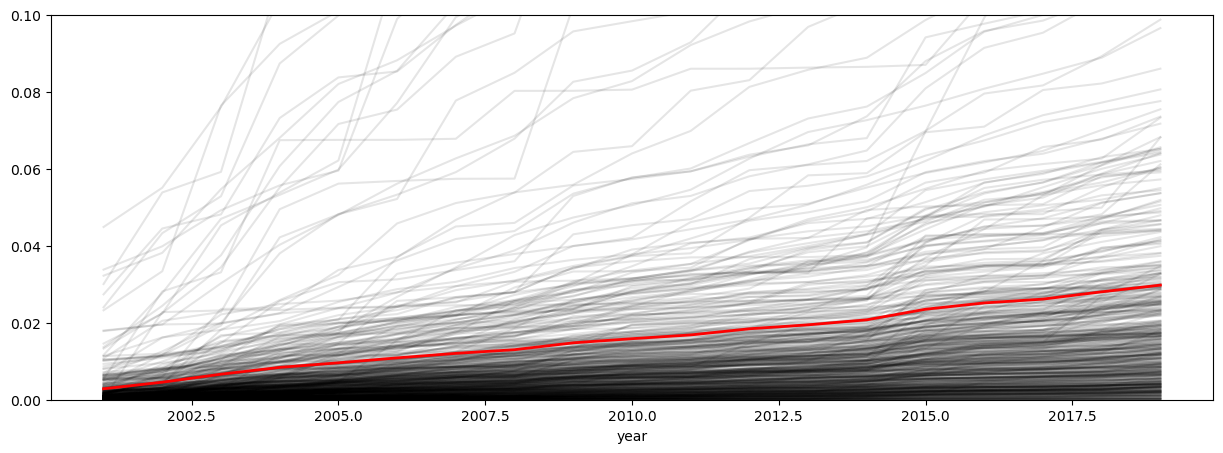

In [47]:
pt = df.pivot_table(index='year', columns='HYBAS_ID', values='growth_ratio')
pt = pt.cumsum()
fig, ax = plt.subplots(figsize=(15, 5))
pt.plot(logy=False, legend=False, alpha=0.1, color='black', ax=ax)
pt.mean(axis=1).plot(ax=ax, color='red', linewidth=2)
ax.set_ylim(0, 0.1)

<Axes: >

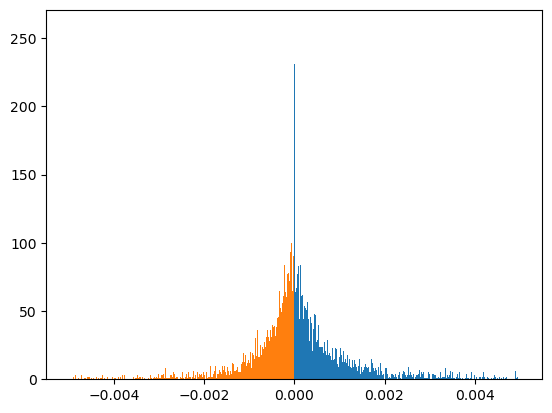

In [66]:
fig, ax = plt.subplots()

df.growth_ratio.hist(bins=np.linspace(0,0.005, 1000), ax=ax, grid=False)
(df.decline_ratio*(-1)).hist(ax=ax, bins=np.linspace(-0.005, 0, 1000), grid=False)

<Axes: >

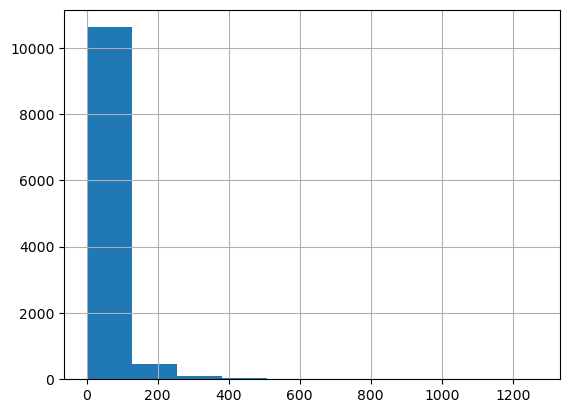

In [68]:
df.water_balance_m3.hist()